In [1]:
# pip install jupyter_bokeh

In [10]:
%reload_ext autoreload
%autoreload 2

## Optimize a dia-PASEF method in Jupyter notebook

In [3]:
import pydiaid.diapasef.cli as cli #todo

In [4]:
method_conf = {
    "input": {
        "save_at": "/Users/patriciaskowronek/Documents/test_folder",
        "PTM": "None",
        "library_name": "/Users/patriciaskowronek/Documents/pydiaid/pydiaid/diapasef/static/AlphaPept_results.csv",
        "analysis_software": "AlphaPept",
    },
    "method_parameters": {
        "mz": [300,1200],
        "ion_mobility": [0.6,1.6],
        "num_dia_pasef_scans": 20,
        "im_steps": 2,
        "overlap": 0,
        "shift_of_final_method": 0,
    },
    "graphs": {
        "plot_mz": [250, 1250],
        "plot_IM": [0.6, 1.6],
        "numbins": 100,
        "window_frame_color": "black",
        "window_color": "white",
        "window_transparency": 0.5
    },
    "optimizer": {
        "optimizer": "Gauss",
        "n_calls": 5, #todo set to 100
        "initial_points": 2, #todo set to 20
        "YA1": [0.5, 0.9],
        "YA2": [0.6, 1.0],
        "YB1": [0.9, 1.5],
        "YB2": [1.0, 1.8],
        "evaluation_parameter": "No. of covered precursors"
    }
}

In [19]:
cli.run_all(
    method_conf
)

# The output can be found in the folder specified at "save_at".

{'precursors within m/z-range [%]': 97.59}
RUN WITH: [0.8764463330166317, 1.2630948905498791, 1.8024002131993178, 1.9073791106769722] | RESULT: 9758.0
RUN WITH: [0.8009630510739123, 1.1871295463646983, 1.5705559417639372, 1.629699477934951] | RESULT: 9912.0
RUN WITH: [0.854409300586086, 1.3363332937194896, 1.4018092556083424, 1.4648813487076182] | RESULT: 10285.0
RUN WITH: [0.8845853269978934, 1.280953367742227, 1.285317473127582, 1.418751914029719] | RESULT: 10847.0
RUN WITH: [0.7694987482402109, 1.1605328631452716, 1.6851513689467232, 1.5708094119528933] | RESULT: 10304.0
########
BEST RESULT
INPUT: [0.8845853269978934, 1.280953367742227, 1.285317473127582, 1.418751914029719]
OUTPUT: 10847.0
########


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [20]:
import pydiaid.diapasef.loader as loader

In [21]:
method_conf["input"]["PTM"] = ["c","ox"]

In [22]:
loader.load_library(
    method_conf["input"]["library_name"],
    method_conf["input"]["analysis_software"],
    method_conf["input"]["PTM"]
)

,mz,IM,Charge,Proteins,Peptide
0,1160.076668,1.300847,2.0,sp|Q13151|ROA0_HUMAN,GHFEAFGTLTDcCVVVVNPQTK_2
1,983.759064,1.035638,3.0,sp|P06748|NPM_HUMAN,aMEDSMDMDMSPLRPQNYLFGcCELK_3
2,994.425313,1.027455,3.0,sp|P06748|NPM_HUMAN,aMEDSoxMDoxMDMSPLRPQNYLFGcCELK_3
3,999.756379,1.039554,3.0,sp|P06748|NPM_HUMAN,aMEDSoxMDoxMDoxMSPLRPQNYLFGcCELK_3
4,1208.091716,1.315002,2.0,sp|P07900|HS90A_HUMAN,VFIMDNcCEELIPEYLNFIR_2
...,...,...,...,...,...
5731,746.687593,1.017635,2.0,sp|Q9H2Z4|NKX24_HUMAN,FMGPSAGVNVAGoxMGSLTGIADAAK_2
5732,1138.590927,1.264702,2.0,sp|P05164|PERM_HUMAN,LFEQVoxMRIGLDLPALNoxMQR_2
5733,765.030461,0.953376,3.0,sp|Q9P003|CNIH4_HUMAN,YIMVPSGNoxMGVFDPTEIHNR_3
5734,765.031268,0.937342,3.0,sp|Q9P003|CNIH4_HUMAN,YIoxMVPSGNMGVFDPTEIHNR_3


## Here, we present the method evaluation steps:

In [2]:
import pandas as pd
import pydiaid.loader as loader
import pydiaid.diapasef.graphs as graphs

#### Loading of the dia-PASEF method and the AlphaPept library.

In [6]:
lib_name = method_conf["input"]["library_name"]
dia_PASEF = "/Users/patriciaskowronek/Documents/pydiaid/pydiaid/diapasef/static/diaPASEF_method.txt"

In [7]:
df_parameters_final = pd.read_csv(
        dia_PASEF,
        skiprows=4,
        names=["MS Type", "Cycle Id", "Start IM", "End IM", "Start Mass", "End Mass", "CE"]
        )

In [8]:
dataframe = pd.read_csv(lib_name)  # .xls, .tsv, .txt
lib = loader.__parse_alpha_pept(dataframe, 'None')

In [83]:
library_name = "/Users/patriciaskowronek/Documents/test_lib_py_diaid/AlphaPept_results.csv"
lib = loader.load_library(
    library_name,
    'AlphaPept',
    'None'
)
lib

,mz,Charge,Proteins,Peptide,IM
2,367.231672,2.0,sp|Q13151|ROA0_HUMAN,LFVGGLK_2,0.726023
3,845.962927,2.0,sp|Q13151|ROA0_HUMAN,LFIGGLNVQTSESGLR_2,1.102190
4,572.594492,3.0,sp|Q13151|ROA0_HUMAN,GFGFVYFQNHDAADK_3,0.824195
5,858.396483,2.0,sp|Q13151|ROA0_HUMAN,GFGFVYFQNHDAADK_2,1.134147
6,726.683059,3.0,sp|Q13151|ROA0_HUMAN,GDVAEGDLIEHFSQFGTVEK_3,0.974275
...,...,...,...,...,...
20087,918.139958,3.0,sp|P22612|KAPCG_HUMAN,DLKPENLLIDQQGYLQVTDFGFAK_3,1.017018
20088,1402.736600,2.0,sp|Q9NRK6|ABCBA_HUMAN,ILLLDEATSALDAENEYLVQEALDR_2,1.454452
20089,725.884070,2.0,sp|Q96JS3|PGBD1_HUMAN,NVSLEVTVQEMRcCVFGVLLLSGFoxMR_2,1.011275
20090,970.487625,3.0,sp|Q8IZL2|MAML2_HUMAN,FPTGTPAAYTPNQSLQQAVGSQQFSQR_3,1.224723


In [85]:
library_name = "/Users/patriciaskowronek/Documents/test_lib_py_diaid/evidence_Phospho_MaxQuant.txt"
lib = loader.load_library(
    library_name,
    'MaxQuant',
    'None'
)
lib

,mz,Charge,Proteins,Peptide,IM,IMlength
0,1294.034660,2,O75822-3;O75822;O75822-2,_(Acetyl (Protein N-term))AAAAAAAGDS(Phospho (...,1.375072,0.066099
1,863.025533,3,O75822-3;O75822;O75822-2,_(Acetyl (Protein N-term))AAAAAAAGDS(Phospho (...,1.101799,0.057206
6,905.723854,3,O75822-3;O75822;O75822-2,_(Acetyl (Protein N-term))AAAAAAAGDS(Phospho (...,1.095075,0.097566
10,932.379298,3,O75822-3;O75822;O75822-2,_(Acetyl (Protein N-term))AAAAAAAGDS(Phospho (...,1.142082,0.107535
14,1514.845560,3,P19338,_AAAAAPASEDEDDEDDEDDEDDDDDEEDDS(Phospho (STY))...,1.162186,0.056931
...,...,...,...,...,...,...
29497,871.034997,3,P53634,_YYSSEYHYVGGFYGGCNEALM(Oxidation (M))K_,0.963398,0.037288
29501,460.237253,2,P07814,_YYTLFGR_,0.816960,0.020526
29503,783.853246,2,P07900;P07900-2,_YYTSASGDEM(Oxidation (M))VSLK_,1.031059,0.020252
29505,468.913860,3,Q5VTE0;P68104;A0A087WVQ9;P68104-2;A0A087WV01;Q...,_YYVTIIDAPGHR_,0.810117,0.044496


In [87]:
library_name = "/Users/patriciaskowronek/Documents/test_lib_py_diaid/MSFragger_whisper40_library_2.tsv"
lib = loader.load_library(
    library_name,
    'MSFragger',
    'None'
)
lib

,mz,Charge,Proteins,Peptide,IM
0,344.816723,3,O43242,C(UniMod:4)YYYHAR,0.706498
7,344.827511,3,Q16658,GEHGFIGC(UniMod:4)R,0.708853
20,345.171915,4,P49736,THVDSHGHNVFK,0.709132
41,345.176028,3,Q9Y3C8,IC(UniMod:4)LTDHFK,0.708233
48,345.183072,3,Q16543,SMVNTKPEK,0.709990
...,...,...,...,...,...
2806825,1279.596945,2,P43007,SNETNGYLDSAQAGPAAGPGAPGTAAGR,1.276377
2806848,1279.658022,3,P26368,AM(UniMod:35)QAAGQIPATALLPTM(UniMod:35)TPDGLAV...,1.175587
2806883,1280.046716,2,Q7L2E3,PSDC(UniMod:4)TLASAQC(UniMod:4)NEYSEEEELVK,1.279063
2806899,1280.137914,2,Q4KMQ1,GDLGPASPSQELGSQPVPGGDGAPALGK,1.276313


In [89]:
library_name = "/Users/patriciaskowronek/Documents/test_lib_py_diaid/20210819_Phospho_HeLa_quadruplicate_Spectronaut_single-shot.xls"
lib = loader.load_library(
    library_name,
    'Spectronaut single-run',
    'None'
)
lib

,mz,Charge,Proteins,Peptide,IM
0,907.885946,2,A0A024QZB8;A0A0A0MRC7;A0A0D9SF04;A0A0D9SFH9;A0...,_RFS[Phospho (STY)]DSEGEETVPEPR_.2,1.096222
1,605.592609,3,A0A024QZB8;A0A0A0MRC7;A0A0D9SF04;A0A0D9SFH9;A0...,_RFSDS[Phospho (STY)]EGEETVPEPR_.3,0.867077
2,605.592613,3,A0A024QZB8;A0A0A0MRC7;A0A0D9SF04;A0A0D9SFH9;A0...,_RFS[Phospho (STY)]DSEGEETVPEPR_.3,0.867077
3,947.868475,2,A0A024QZB8;A0A0A0MRC7;A0A0D9SF04;A0A0D9SFH9;A0...,_RFS[Phospho (STY)]DS[Phospho (STY)]EGEETVPEPR_.2,1.102945
4,632.247868,3,A0A024QZB8;A0A0A0MRC7;A0A0D9SF04;A0A0D9SFH9;A0...,_RFS[Phospho (STY)]DS[Phospho (STY)]EGEETVPEPR_.3,0.811274
...,...,...,...,...,...
242157,1031.445494,3,Q9UQ35,_HGGS[Phospho (STY)]PQPLATTPLSQEPVNPPS[Phospho...,1.049080
242224,838.012410,3,Q9UQ35,_VKPET[Phospho (STY)]PPRQSHS[Phospho (STY)]GS[...,0.964552
242507,1194.213835,3,Q9Y232;Q9Y232-2,_TAVDGFQSES[Phospho (STY)]PEKLDPVEQGQEDTVAPEVA...,1.115264
242508,1194.213835,3,Q9Y232;Q9Y232-2,_T[Phospho (STY)]AVDGFQSESPEKLDPVEQGQEDTVAPEVA...,1.119741


In [94]:
library_name = "/Users/patriciaskowronek/Documents/test_lib_py_diaid/Spectronaut_60SPD_K562_16ug_48fract.tsv"
lib = loader.load_library(
    library_name,
    'Spectronaut library',
    'None'
)
lib

,mz,Charge,Proteins,Peptide,IM
0,365.726521,2,Q6P2C8,_LSNLVGK_,0.742338
7,374.241807,2,Q8N1G2,_FLIGLGK_,0.753930
12,380.721239,2,Q96I59,_FIAPGQK_,0.726643
20,377.201825,2,Q96M27,_AIAGMYK_,0.730739
24,385.199282,2,Q96M27,_AIAGM[Oxidation (M)]YK_,0.732104
...,...,...,...,...,...
3098537,738.854032,4,Q9P2Y5,_GEDLVGSLNGGHANVHPSQEQGEALSGHR_,0.977450
3098555,521.288005,2,Q9UQ35,_TPPVALNSSR_,0.859946
3098564,611.310820,2,Q9BSJ5,_GLTLGVETC[Carbamidomethyl (C)]GSK_,0.940392
3098582,789.365170,2,P25054,_QSLYGDYVFDTNR_,1.037921


In [129]:
library_name = "/Users/patriciaskowronek/Documents/test_lib_py_diaid/DIANN_lib.tsv"
lib = loader.load_library(
    library_name,
    'DIANN library',
    'None'
)
lib

332342
329060


,mz,Charge,Proteins,Peptide,IM
0,478.77982,2,RL4_HUMAN,AAAAAAALQAK,0.897448
12,642.82190,2,MK01_HUMAN,(UniMod:1)AAAAAAGAGPEMVR,1.026091
24,559.28345,2,SGT1_HUMAN,(UniMod:1)AAAAAGTATSQR,0.953647
36,659.80646,2,GET4_HUMAN,(UniMod:1)AAAAAMAEQESAR,1.025260
48,823.38190,2,RCC2_HUMAN,AAAAAWEEPSSGNGTAR,1.051616
...,...,...,...,...,...
332284,492.28165,2,PRP8_HUMAN,YYVLNALK,0.867934
332295,702.86713,2,EF1A1_HUMAN,YYVTIIDAPGHR,1.072788
332307,468.91385,3,EF1A1_HUMAN,YYVTIIDAPGHR,0.837373
332319,934.40637,2,ESF1_HUMAN,YYYAVVDC(UniMod:4)DSPETASK,1.165604


In [101]:
library_name = "/Users/patriciaskowronek/Documents/test_lib_py_diaid/DIANN_5_6min_50ng_syP_2equiScans_wide_lib.tsv"
lib = loader.load_library(
    library_name,
    'DIANN single-run',
    'None',
)
lib

,mz,Charge,Proteins,Peptide,IM
0,445.213778,2,,YAFDFAR__,0.814167
1,506.749670,2,,YMDLLWR_Oxidation@M_2,0.831667
3,389.228897,2,,DGVVLFK__,0.733958
6,519.223485,2,,MFEFYER_Oxidation@M_1,0.842917
10,424.716685,2,,LGQDPYR__,0.778854
...,...,...,...,...,...
87620,881.030083,5,,NDPPMEAAGFTAQVIILNHPGQISAGYAPVLDCHTAHIACK_Oxid...,1.096980
87621,887.028644,5,,NDPPMEAAGFTAQVIILNHPGQISAGYAPVLDCHMAHIACK_Oxid...,1.097190
87628,952.987623,4,,ALANVNIGSLICNVGAGGPAPAAGAAPAGGPAPSTAAAPAEEK_Ca...,1.189580
87632,808.566981,5,,TDNAGDQHGGGGGGGGGAGAAGGGGGGENYDDPHKTPASPVVHIR__,1.032610


In [112]:
library_name = "/Users/patriciaskowronek/Documents/test_lib_py_diaid/sample_openswath.tsv"
lib = loader.load_library(
    library_name,
    'OpenSWATH',
    'None',
    require_im = False
)
lib

,mz,Charge,Proteins,Peptide,IM
0,726.835714,2,1/iRT|iRT_Biognosys|iRT_Biognosys,ADVTPADFSEWSK,<NA>
6,699.338424,2,1/iRT|iRT_Biognosys|iRT_Biognosys,DGLDAASYYAPVR,<NA>
12,644.822606,2,1/iRT|iRT_Biognosys|iRT_Biognosys,GAGSSEPVTGLDAK,<NA>
18,636.869163,2,1/iRT|iRT_Biognosys|iRT_Biognosys,GTFIIDPAAVIR,<NA>
24,622.853512,2,1/iRT|iRT_Biognosys|iRT_Biognosys,GTFIIDPGGVIR,<NA>
30,776.929751,2,1/iRT|iRT_Biognosys|iRT_Biognosys,LFLQFGAQGSPFLK,<NA>
36,487.256705,2,1/iRT|iRT_Biognosys|iRT_Biognosys,LGGNEQVTR,<NA>
42,669.838059,2,1/iRT|iRT_Biognosys|iRT_Biognosys,TPVISGGPYEYR,<NA>
48,683.853710,2,1/iRT|iRT_Biognosys|iRT_Biognosys,TPVITGAPYEYR,<NA>
54,683.827889,2,1/iRT|iRT_Biognosys|iRT_Biognosys,VEATFGVDESNAK,<NA>


In [119]:
library_name = "/Users/patriciaskowronek/Documents/test_lib_py_diaid/AlphaDIA_precursors.tsv"
lib = loader.load_library(
    library_name,
    'AlphaDIA',
    'None',
)
lib

339725
339725


,mz,Charge,Proteins,Peptide,IM,IMlength
0,960.451233,3,Q01658,75530,0.995989,0.025515
1,1019.863464,3,P04075,296424,1.073026,0.025432
2,1019.170288,3,P0DMV8,72464,1.062713,0.025466
3,997.189697,3,P13639,174612,1.102407,0.021367
4,712.988708,3,Q13263,122411,0.893838,0.025710
...,...,...,...,...,...,...
339709,427.741516,2,P32189,96351,0.778549,0.021811
339712,370.186005,3,Q15257,69723,0.732288,0.025944
339717,594.832458,2,Q66GS9,23457,0.910345,0.025668
339718,648.358826,2,Q562E7,288781,0.977733,0.022911


#### Generating plots that belong only to the library.

In [9]:
x, y, z = graphs.kernel_density_calculation(
    lib,
    100,
)

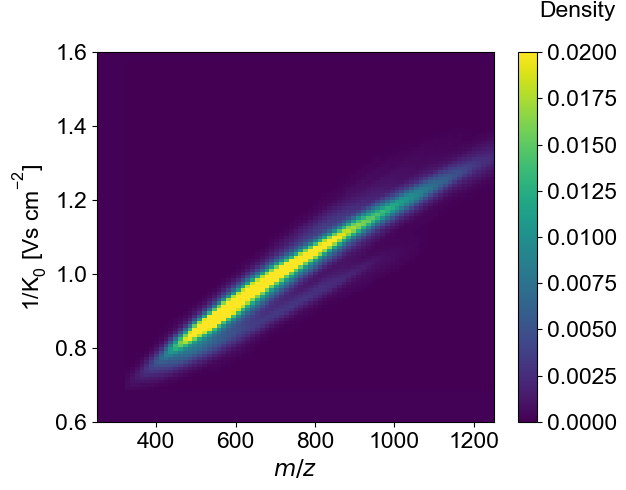

In [10]:
plt_proteomics = graphs.plot_density(
    x,
    y,
    z,
    method_conf["graphs"],
    method_conf["input"]["save_at"]+r"/Plot_proteomics_precursors.pdf",
    gui = True
)

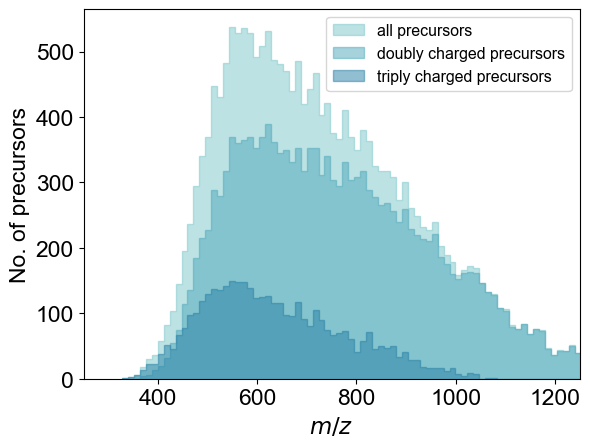

In [11]:
hist_mz = graphs.plot_precursor_distribution_as_histogram(
    lib,
    method_conf["graphs"],
    method_conf["input"]["save_at"]+r"\histogram_proteomics_precursors_mz.pdf",
    gui = True    
)

#### Plotting the dia-PASEF method on top of the kernel density distribution.

In [12]:
import panel as pn
pn.extension()

In [13]:
save_figure_at = method_conf["input"]["save_at"]+"\Plot_method.png"

graphs.plot_density_and_method(
    df_parameters_final,
    x,
    y,
    z,
    method_conf["graphs"],
    save_figure_at,
)

<Figure size 640x480 with 0 Axes>

In [14]:
pn.pane.PNG(
    save_figure_at,
    height=345,
    width=460,
    align='center',
    margin=(0, 20, 0, 0)
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'cd2e7ebd-7f90-4640-bd2e-a6bc89ce7390': {'version…

#### Evaluate the die-PASEF method.

In [15]:
import pydiaid.diapasef.method_evaluation as evaluator

In [16]:
dict_coverage = evaluator.coverage(
    df_parameters_final,
    lib,
)
dict_coverage

{'unique proteins in the library': 3420,
 'unique precursors in the library': 19998,
 'smallest diaPASEF window': 30.05,
 'biggest diaPASEF window': 171.11,
 'average diaPASEF window size': 54.92,
 'No. of covered proteins': 3393,
 'No. of covered precursors': 19004,
 'all proteins covered': '99.2%',
 'all precursors covered': '95.0%',
 'No. of covered, doubly charged precursors': 14933,
 'all doubly charged precursors covered': '96.1%',
 'No. of covered, triply charged precursors': 3662,
 'all triply charged precursors covered': '90.7%',
 'No. of covered, quadruply charged precursors': 233,
 'all quadruply charged precursors covered': '97.9%',
 'No. of covered, singly charged precursors': 171,
 'all singly charged precursors covered': '94.5%'}